In [1]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
# We have 28 rows and 28 Colns of one Image and we have 60k such Images
X_train[0].shape

(28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

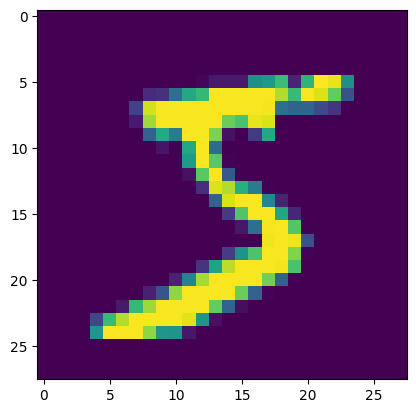

In [7]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])

In [8]:
X_train= X_train/255
X_test = X_test/255

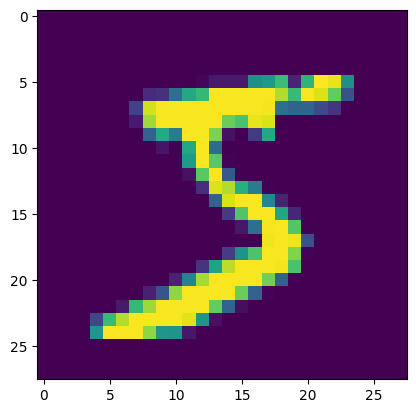

In [9]:
plt.imshow(X_train[0])

In [10]:
# We have all row as 28X28 but we need to convert them to (1,784)

In [11]:
model = Sequential()

model.add(Flatten(input_shape=(28,28))) # Converted to 1d
model.add(Dense(128,activation = 'relu')) # we don't need to give Input as o/p of Flatten will be given to flatten
model.add(Dense(10,activation = 'softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])

In [14]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10


1500/1500 [==============================] - 6s 3ms/step - loss: 0.2822 - accuracy: 0.9187 - val_loss: 0.1528 - val_accuracy: 0.9570
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1266 - accuracy: 0.9621 - val_loss: 0.1109 - val_accuracy: 0.9684
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0864 - accuracy: 0.9750 - val_loss: 0.1002 - val_accuracy: 0.9706
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0646 - accuracy: 0.9799 - val_loss: 0.0916 - val_accuracy: 0.9728
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0486 - accuracy: 0.9854 - val_loss: 0.0971 - val_accuracy: 0.9727
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0385 - accuracy: 0.9885 - val_loss: 0.0885 - val_accuracy: 0.9755
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0307 - accuracy: 0.9903 - val_loss: 0.0880 - val_accurac

In [15]:
y_probab = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [16]:
np.argmax(y_probab,axis=1)

# or

y_pred = y_probab.argmax(axis=1)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9761

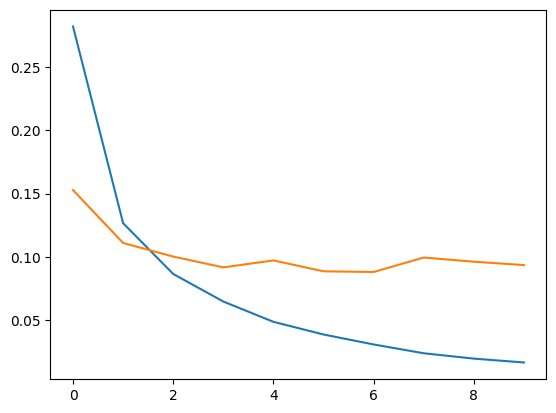

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


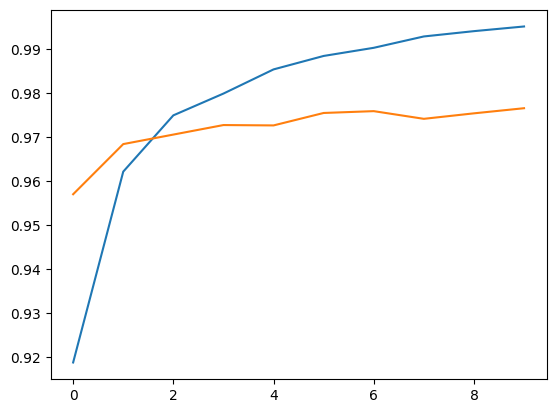

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [24]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 32ms/step


array([2], dtype=int64)

In [25]:
y_test[1]

2